<a href="https://colab.research.google.com/github/harsh31415926/Deep-Learning/blob/main/YT2_Gradient_Descent_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
path = "/content/drive/MyDrive/Colab/homeprices.csv"
df = pd.read_csv(path)
df = df.drop('age' , axis = 'columns')
df.head()


,area,bedrooms,price
0,2600,3,550000
1,3000,4,565000
2,3200,3,610000
3,3600,3,595000
4,4000,5,760000


In [ ]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.        , 0.        ],
       [0.26666667, 0.33333333],
       [0.4       , 0.        ],
       [0.66666667, 0.        ],
       [0.93333333, 0.66666667],
       [1.        , 1.        ]])

In [ ]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0] , 1))
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

# Price = W1 * area + W2 * bedroom + bias

In [ ]:
# Gradient Descent

def batch_gradient_descent(x , y_true , epochs , learning_rate = 0.01):
  number_of_features = x.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0

  total_samples = x.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w , x.T) + b

    w_grad = -(2/total_samples)*(x.T.dot(y_true - y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)

    w = w-learning_rate*w_grad
    b = b-learning_rate*b_grad

    np.square(y_true-y_predicted)
    cost = np.mean(np.square(y_true-y_predicted))



    if i%1 == 0 :
      # print(f'cost is {cost} and weight is : {w} and bias is : {b} and epoch is :{i}')
      cost_list.append(cost)
      epoch_list.append(i)

  return w , b , cost ,cost_list , epoch_list

In [ ]:
w,b,cost ,cos_l , epoch_l = batch_gradient_descent(scaled_x , scaled_y.reshape(scaled_y.shape[0],), 500)

In [ ]:
w,b,cost

(array([0.58867904, 0.57701192]),
 np.float64(-0.14323766628236548),
 np.float64(0.011394412598084299))

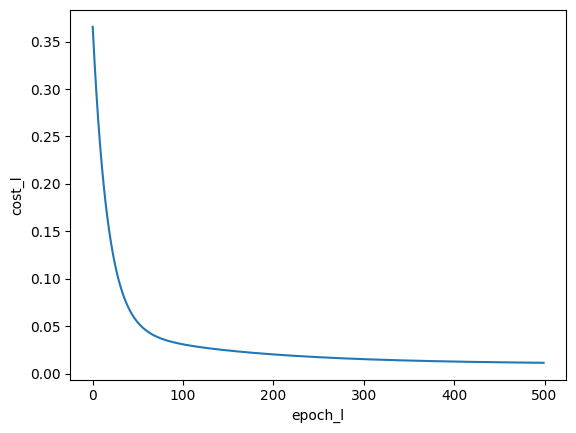

In [ ]:
plt.xlabel("epoch_l")
plt.ylabel("cost_l")
plt.plot(epoch_l , cos_l)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Prediction Function

def predict(area , bedroom , w , b ):
  scaled_x = sx.transform([[area , bedroom]])[0]
  scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b

  return sy.inverse_transform([[scaled_price]])


print(predict(2600 , 3,w,b))

[[512758.20676659]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
def stochastic_descent(x , y_true , epoch , learning_rate= 0.01 ):
  number_of_features = x.shape[1]

  w = np.ones(shape = (number_of_features))
  b = 0

  total_samples = x.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epoch):
    random_index = random.randint(0 , total_samples-1)
    sample_x = x[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w , sample_x.T)+b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
    b_grad = -(2/total_samples)*(sample_y - y_predicted)

    w = w-learning_rate*w_grad
    b = b-learning_rate*b_grad

    cost = np.square(sample_y-y_predicted)

    if i%80 == 0 :
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost , cost_list , epoch_list

In [ ]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.5513278 , 0.51704179]),
 np.float64(-0.08537704840832579),
 np.float64(0.0011604343790135986))

In [ ]:
w , b,cost

(array([0.58867904, 0.57701192]),
 np.float64(-0.14323766628236548),
 np.float64(0.011394412598084299))

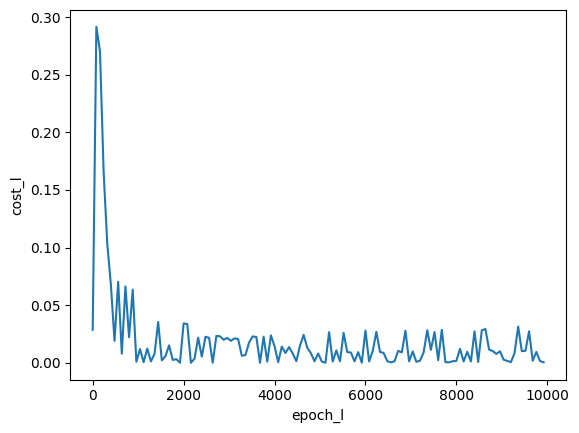

In [ ]:
plt.xlabel("epoch_l")
plt.ylabel("cost_l")
plt.plot(epoch_list_sgd , cost_list_sgd)